In [1]:
import datetime as dt
from sklearn.metrics import r2_score
from Data import Data
from matplotlib import pyplot as plt
import math
import numpy as np

# choose the time range of data:
start_date, end_date = dt.datetime.today() - dt.timedelta(days=120), dt.datetime.today()
data = Data()

bitcoin


In [2]:
# load the data where BTC-USD is bitcoin price in usd and "bitcoin" column indicates google trend hits
full_data = data.gather_data(start_date, end_date)
full_data.head()

overlap 2021-09-07T00:00:00.000000000
start:  2021-09-07 20:15:17.535951 end:  2021-10-07 20:15:17.535951
overlap 2021-10-07T00:00:00.000000000
start:  2021-10-07 20:15:17.535951 end:  2021-11-06 20:15:17.535951
overlap 2021-11-06T00:00:00.000000000
start:  2021-11-06 20:15:17.535951 end:  2021-12-06 20:15:17.535951
overlap 2021-12-06T00:00:00.000000000


,Date,^GSPC,^VIX,Volume,BTC-USD,bitcoin
0,2021-09-07,4520.029785,18.139999,65210059683,46811.128906,100.0
1,2021-09-08,4514.069824,17.959999,49007762488,46091.390625,92.0
2,2021-09-09,4493.279785,18.799999,38672657013,46391.421875,73.0
3,2021-09-10,4458.580078,20.950001,39154666597,44883.910156,60.0
4,2021-09-11,4458.580078,20.950001,34499835245,45201.457031,53.0


In [3]:
import pandas as pd 
from pandas import DataFrame
from pandas import concat
from math import sqrt
from numpy import concatenate
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as pyplot 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from pandas import read_csv
from GoogleTrendAPI_Direct import GoogleTrendAPI



In [4]:
# load the google trend data for keyword Blockchain from the api
google_trend_api = GoogleTrendAPI("Blockchain")
google_trend_blockchain = google_trend_api.get_data(start_date, end_date)

Blockchain
overlap 2021-09-07T00:00:00.000000000
start:  2021-09-07 20:15:17.535951 end:  2021-10-07 20:15:17.535951
overlap 2021-10-07T00:00:00.000000000
start:  2021-10-07 20:15:17.535951 end:  2021-11-06 20:15:17.535951
overlap 2021-11-06T00:00:00.000000000
start:  2021-11-06 20:15:17.535951 end:  2021-12-06 20:15:17.535951
overlap 2021-12-06T00:00:00.000000000


In [5]:
# load the google trend data for keyword Cryptocurrency from the api
google_trend_crypto = GoogleTrendAPI("Cryptocurrency")
google_trend_crypto = google_trend_crypto.get_data(start_date, end_date)


Cryptocurrency
overlap 2021-09-07T00:00:00.000000000
start:  2021-09-07 20:15:17.535951 end:  2021-10-07 20:15:17.535951
overlap 2021-10-07T00:00:00.000000000
start:  2021-10-07 20:15:17.535951 end:  2021-11-06 20:15:17.535951
overlap 2021-11-06T00:00:00.000000000
start:  2021-11-06 20:15:17.535951 end:  2021-12-06 20:15:17.535951
overlap 2021-12-06T00:00:00.000000000


In [12]:
final_data = full_data.merge(google_trend_crypto, on=['Date'])
final_data = final_data.merge(google_trend_blockchain, on=['Date'])

In [13]:
final_data["output"] = final_data["BTC-USD"]
del final_data["BTC-USD"]

In [14]:
final_data

,Date,^GSPC,^VIX,Volume,bitcoin,Cryptocurrency,Blockchain,output
0,2021-09-07,4520.029785,18.139999,65210059683,100.000000,94.0000,78.000000,46811.128906
1,2021-09-08,4514.069824,17.959999,49007762488,92.000000,70.0000,74.000000,46091.390625
2,2021-09-09,4493.279785,18.799999,38672657013,73.000000,81.0000,67.000000,46391.421875
3,2021-09-10,4458.580078,20.950001,39154666597,60.000000,76.0000,76.000000,44883.910156
4,2021-09-11,4458.580078,20.950001,34499835245,53.000000,70.0000,49.000000,45201.457031
...,...,...,...,...,...,...,...,...
113,2021-12-29,4793.060059,16.950001,30049226299,62.045526,78.2772,96.712018,46444.710938
114,2021-12-30,4778.729980,17.330000,26686491018,60.193421,77.2194,94.324067,47178.125000
115,2021-12-31,4766.180176,17.219999,36974172400,57.415263,71.9304,79.996360,46306.445312
116,2022-01-01,4766.180176,17.219999,24582667004,55.563158,72.9882,77.608409,47686.812500


In [15]:
final_data = final_data.set_index("Date")
values = final_data.values

In [16]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# Here is created input columns which are (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# Here is created output/forecast column which are (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

# here checked values numeric format 
values = values.astype('float32')


In [17]:
# Dataset values are normalized by using MinMax method
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
#print(scaled)

# Normalized values are converted for supervised learning 
reframed = series_to_supervised(scaled,1,1)
#reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.445736   0.194289   1.000000   0.612172      0.176   0.389953   
2   0.433638   0.183116   0.649145   0.521480      0.080   0.344077   
3   0.391433   0.235258   0.425341   0.306086      0.124   0.263792   
4   0.320991   0.368715   0.435779   0.158711      0.104   0.367015   
5   0.320991   0.368715   0.334980   0.079356      0.080   0.057346   

   var7(t-1)   var1(t)   var2(t)   var3(t)   var4(t)  var5(t)   var6(t)  \
1   0.227642  0.433638  0.183116  0.649145  0.521480    0.080  0.344077   
2   0.200859  0.391433  0.235258  0.425341  0.306086    0.124  0.263792   
3   0.212024  0.320991  0.368715  0.435779  0.158711    0.104  0.367015   
4   0.155926  0.320991  0.368715  0.334980  0.079356    0.080  0.057346   
5   0.167743  0.320991  0.368715  0.191673  0.068019    0.072  0.068815   

    var7(t)  
1  0.200859  
2  0.212024  
3  0.155926  
4  0.167743  
5  0.199813  


In [24]:
values = reframed.values 
train_size = int(len(values)*0.70)
train = values[:train_size,:]
test = values[train_size:,:]

# Splitted datasets are splitted to trainX, trainY, testX and testY 
trainX, trainY = train[:,:-1], train[:,-1]
testX, testY = test[:,:-1], test[:,-1]
print(trainY, trainY.shape)

[0.20085895 0.21202374 0.15592635 0.16774285 0.19981253 0.15887225
 0.23811185 0.27844417 0.2638203  0.24462497 0.28224027 0.2443533
 0.08001018 0.         0.1072011  0.15634274 0.07985938 0.07527649
 0.09358275 0.0573827  0.01268435 0.03239989 0.11525321 0.27623355
 0.26114583 0.2793225  0.313295   0.40267456 0.5458151  0.48793328
 0.49395669 0.5311824  0.52386487 0.62482846 0.57110465 0.62171423
 0.6187531  0.777738   0.751624   0.77623713 0.79381835 0.87702096
 0.9414288  0.80066884 0.7441846  0.77028334 0.75306237 0.83154166
 0.7319616  0.66195095 0.7415751  0.8013309  0.7887112  0.76750505
 0.7558001  0.83848464 0.8289453  0.7724644  0.7603127  0.7752646
 0.8422276  0.9999999  0.9778589  0.90430605 0.9026214  0.8730744
 0.8847436  0.92185557 0.85081923 0.7244245  0.7321185  0.60463536
 0.64845026 0.7071563  0.671183   0.5803417  0.62796485 0.58001196
 0.61701    0.47914326 0.5254837 ] (81,)


In [25]:
# Train and Test datasets are reshaped in 3D size to be used in LSTM
trainX = trainX.reshape((trainX.shape[0],1,trainX.shape[1]))
testX = testX.reshape((testX.shape[0],1,testX.shape[1]))
print(trainX.shape, trainY.shape,testX.shape,testY.shape)

# LSTM model is created and adjusted neuron structure
model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.05))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mae', optimizer='adam')
# Dataset is trained by using trainX and trainY
history = model.fit(trainX, trainY, epochs=10, batch_size=25, validation_data=(testX, testY), verbose=2, shuffle=False)

(81, 1, 13) (81,) (36, 1, 13) (36,)
Epoch 1/10
4/4 - 1s - loss: 0.4917 - val_loss: 0.2164
Epoch 2/10
4/4 - 0s - loss: 0.4132 - val_loss: 0.1247
Epoch 3/10
4/4 - 0s - loss: 0.3424 - val_loss: 0.0919
Epoch 4/10
4/4 - 0s - loss: 0.2841 - val_loss: 0.1168
Epoch 5/10
4/4 - 0s - loss: 0.2298 - val_loss: 0.1685
Epoch 6/10
4/4 - 0s - loss: 0.1951 - val_loss: 0.2331
Epoch 7/10
4/4 - 0s - loss: 0.1760 - val_loss: 0.2900
Epoch 8/10
4/4 - 0s - loss: 0.1698 - val_loss: 0.3201
Epoch 9/10
4/4 - 0s - loss: 0.1656 - val_loss: 0.3247
Epoch 10/10
4/4 - 0s - loss: 0.1671 - val_loss: 0.3114


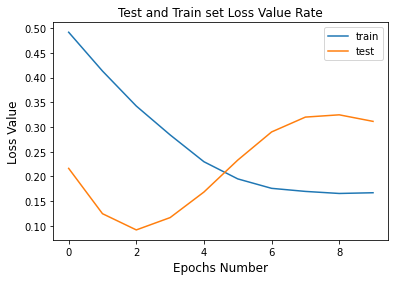

In [26]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title("Test and Train set Loss Value Rate")
plt.xlabel('Epochs Number', fontsize=12)
plt.ylabel('Loss Value', fontsize=12)
plt.legend()
plt.show()

In [27]:
# Prediction process is performed for train dataset
trainPredict = model.predict(trainX)
trainX = trainX.reshape((trainX.shape[0], trainX.shape[2]))
print(trainX.shape)

# Prediction process is performed for test dataset
testPredict = model.predict(testX)
testX = testX.reshape((testX.shape[0], testX.shape[2]))
print(testX.shape)

(81, 13)
(36, 13)


In [28]:
# Trains dataset inverts scaling for training
train_predict_org = trainPredict
test_predict_org = testPredict
trainPredict = concatenate((trainPredict, trainX[:, -6:]), axis=1)
trainPredict = scaler.inverse_transform(trainPredict)
trainPredict = trainPredict[:,0]

# Test dataset inverts scaling for forecasting
testPredict = concatenate((testPredict, testX[:, -6:]), axis=1)
testPredict = scaler.inverse_transform(testPredict)
testPredict = testPredict[:,0]

# invert scaling for actual
testY = testY.reshape((len(testY), 1))
inv_y = concatenate((testY, testX[:, -6:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
#print('actual: ', len(inv_y))

# Performance measure calculated by using mean_squared_error for train and test prediction
rmse2 = sqrt(mean_squared_error(trainY, trainPredict))
print('Train RMSE: %.3f' % rmse2)
rmse = sqrt(mean_squared_error(inv_y, testPredict))
print('Test RMSE: %.3f' % rmse)

Train RMSE: 4589.206
Test RMSE: 166.363


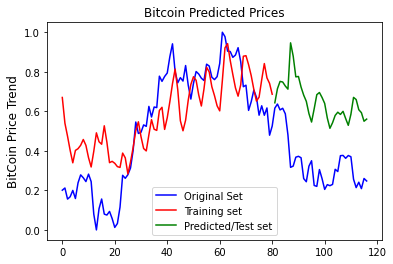

In [30]:
output = np.append(train_predict_org, test_predict_org)
#print(len(son))

final = pd.DataFrame(data=output, columns=['BTC_USD'])
actual = final_data.output
actual = values[:,-1]
actual = pd.DataFrame(data=actual, columns=['BTC_USD'])

# Finally training and prediction result are visualized
pyplot.plot(actual.BTC_USD, 'b', label='Original Set')
pyplot.plot(final.BTC_USD[0:train_size], 'r' , label='Training set')
pyplot.plot(final.BTC_USD[train_size:], 'g' , label='Predicted/Test set')
pyplot.title("Bitcoin Predicted Prices")
pyplot.ylabel('BitCoin Price Trend', fontsize=12)
pyplot.legend(loc='best')
pyplot.show()